In [11]:
import pandas as pd

# Load Titanic dataset
# NOTE: Make sure titanic.csv exists at this path or update the path accordingly.
# You can download from here.  https://www.kaggle.com/datasets/yasserh/titanic-dataset
titanic_path = "D:\Programming\AI_ML Expert\AI_ML Expert With Phitron Batch 01\Datasets/titanic-dataset.csv"  # change if needed
df_titanic = pd.read_csv(titanic_path)

print("First 10 rows of Titanic dataset:")
df_titanic.head(10)
     

First 10 rows of Titanic dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
df_titanic.shape

(891, 12)

In [13]:
print("Unique values per column:")
df_titanic.nunique()
     

Unique values per column:


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [14]:
print("Missing values per column:")
df_titanic.isnull().sum()

Missing values per column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Distribution of Age Column:


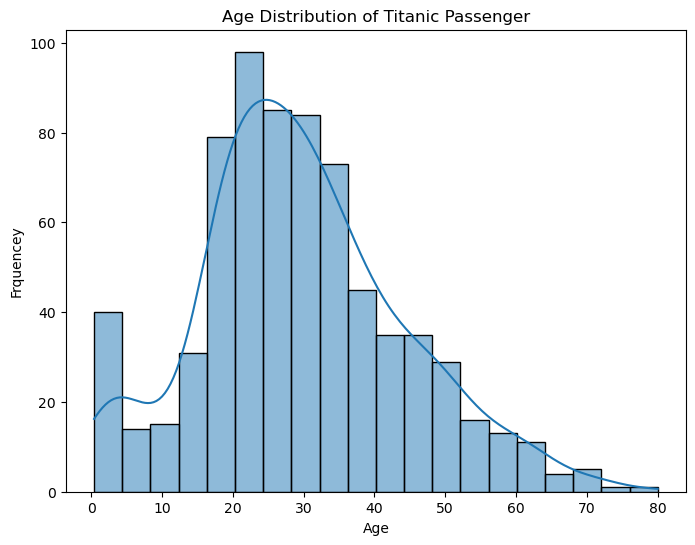

In [15]:
print("Distribution of Age Column:")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df_titanic["Age"], kde = True, bins = 20)
plt.title("Age Distribution of Titanic Passenger")
plt.xlabel("Age")
plt.ylabel("Frquencey")
plt.show()
#We will use Median as the feature values are right skewed

Distribution of Embarked Column:


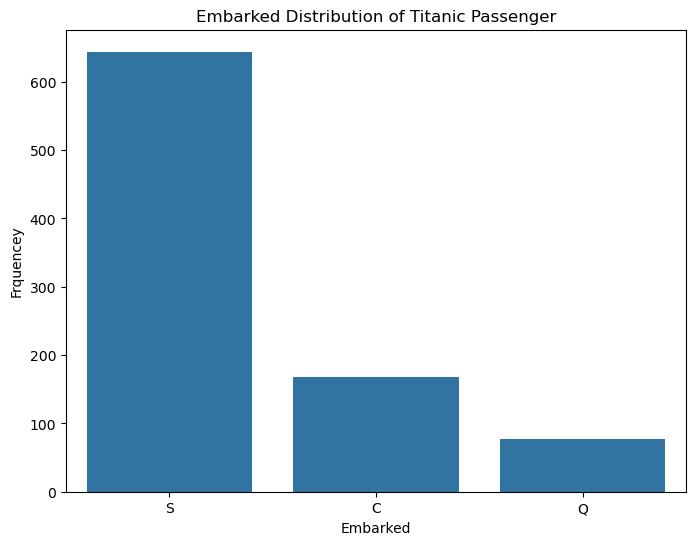

In [16]:
print("Distribution of Embarked Column:")
plt.figure(figsize=(8,6))
sns.countplot(data=df_titanic, x="Embarked")
plt.title("Embarked Distribution of Titanic Passenger")
plt.xlabel("Embarked")
plt.ylabel("Frquencey")
plt.show()
#

In [17]:

# 1. Handle numeric missing values: Age
age_median = df_titanic["Age"].median()
df_titanic["Age"] = df_titanic["Age"].fillna(age_median)

# 2. Handle categorical missing values: Embarked
embarked_mode = df_titanic["Embarked"].mode()[0]
df_titanic["Embarked"] = df_titanic["Embarked"].fillna(embarked_mode)

# 3. Drop Cabin (too many missing values)
df_titanic = df_titanic.drop(columns=["Cabin"])

In [18]:
print("Missing values after handling:")
df_titanic.isnull().sum()

Missing values after handling:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64